Instalando bibliotecas novas

In [1]:
#pip install MetaTrader5
#pip install mplfinance
#pip install pytz

Importando bibliotecas

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf
import pytz
import time
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5

Abre o software MetaTrader5 e loga na última conta já configurada. 
Pode passar o login, senha e servidor na função caso necessário.
Conta demo criada na corretora ActivTrades, https://www.activtrades.com/pt/

In [5]:
login = 5568586
password = "DLUZbkul"
server = "ActivTrades-Server"

if mt5.initialize(login=login, password=password, server=server):
    print("Conectado com sucesso")
else:
    print("Falha de inicialização, error code =",mt5.last_error())

Conectado com sucesso


Verificando versão do MetaTrader5

In [6]:
print("MetaTrader5 package author: ",mt5.__author__,"\n")

print("MetaTrader5 package version: ",mt5.__version__)

MetaTrader5 package author:  MetaQuotes Software Corp. 

MetaTrader5 package version:  5.0.34


Verificando informações do terminal do MetaTrader5

In [7]:
terminal_info=mt5.terminal_info()

terminal_info_dict = mt5.terminal_info()._asdict()
df=pd.DataFrame(list(terminal_info_dict.items()),columns=['property','value'])

print("terminal_info() as dataframe:")
print(df)

terminal_info() as dataframe:
                 property                                              value
0       community_account                                              False
1    community_connection                                              False
2               connected                                               True
3            dlls_allowed                                              False
4           trade_allowed                                              False
5       tradeapi_disabled                                              False
6           email_enabled                                              False
7             ftp_enabled                                              False
8   notifications_enabled                                              False
9                    mqid                                              False
10                  build                                               2982
11                maxbars                     

Verificando informações da conta logada no MetaTrader5

In [8]:
account_info=mt5.account_info()
 
account_info_dict = mt5.account_info()._asdict()
df=pd.DataFrame(list(account_info_dict.items()),columns=['property','value'])

print("account_info() as dataframe:")
print(df)

account_info() as dataframe:
              property               value
0                login             5568586
1           trade_mode                   0
2             leverage                 400
3         limit_orders                 200
4       margin_so_mode                   0
5        trade_allowed                True
6         trade_expert                True
7          margin_mode                   0
8      currency_digits                   2
9           fifo_close               False
10             balance               250.0
11              credit                 0.0
12              profit                 0.0
13              equity               250.0
14              margin                 0.0
15         margin_free               250.0
16        margin_level                 0.0
17      margin_so_call                50.0
18        margin_so_so                30.0
19      margin_initial                 0.0
20  margin_maintenance                 0.0
21              assets   

Verificando quantidade de simbolos disponíveis no servidor logado no MT5

In [9]:
symbols=mt5.symbols_total()
if symbols>0:
    print("Total symbols =",symbols)
else:
    print("symbols not found")

Total symbols = 624


Adicionando o símbolo do ativo no display do MT5

In [10]:
selected=mt5.symbol_select("Ger30Sep21",True)

Exibindos propriedades relevantes do ativo

In [11]:
symbol_info=mt5.symbol_info("Ger30Sep21")

print("Ger30Sep21: spread =",symbol_info.spread,"  digits =",symbol_info.digits)

Ger30Sep21: spread = 20   digits = 1


Verificando a quantidade de ordens executadas num período de tempo

In [12]:
from_date=datetime(2021,7,1) #format (year, mounth, day)
to_date=datetime.now()

history_orders=mt5.history_orders_get(from_date, to_date, group="*Ger*")

print("Ordens Quantity({}, {}, group=\"*Ger*\")={}".format(from_date,to_date,len(history_orders)))


Ordens Quantity(2021-07-01 00:00:00, 2021-07-03 16:37:46.629360, group="*Ger*")=0


Verificando as histórico de ordens nuno formato de dataframe (TESTAR QUANDO EXISTIREM ORDENS)

In [13]:
from_date=datetime(2021,7,1) #format (year, mounth, day)
to_date=datetime.now()

deals = mt5.history_deals_get(from_date, to_date, group="*Ger*")

if len(deals) > 0:
    df=pd.DataFrame(list(deals),columns=deals[0]._asdict().keys())
    df['time'] = pd.to_datetime(df['time'], unit='s')
    print(df)

else:
    print("Sem ordens neste período")

Sem ordens neste período


Explorando dataframe do histórico de ordens

In [14]:
#df.columns
#df = df.drop(columns=['magic', 'fee', 'comment', 'external_id'])
#df.columns

Extraindo um dataframe com preços de candlesticks

In [15]:
rates = mt5.copy_rates_from_pos("Ger30Sep21", mt5.TIMEFRAME_M10, 0, 100)
rates_frame = pd.DataFrame(rates)

rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')
print(rates_frame) 

                  time     open     high      low    close  tick_volume  \
0  2021-07-02 05:20:00  15625.0  15625.0  15617.5  15621.0           42   
1  2021-07-02 05:30:00  15621.0  15621.0  15613.5  15615.5           91   
2  2021-07-02 05:40:00  15615.5  15619.0  15614.5  15615.5           58   
3  2021-07-02 05:50:00  15616.5  15616.5  15607.5  15610.5           67   
4  2021-07-02 06:00:00  15612.0  15615.5  15610.5  15611.0           64   
..                 ...      ...      ...      ...      ...          ...   
95 2021-07-02 21:10:00  15640.5  15644.5  15638.5  15643.0          289   
96 2021-07-02 21:20:00  15643.0  15645.5  15641.5  15643.5          111   
97 2021-07-02 21:30:00  15643.0  15647.0  15639.5  15643.5          237   
98 2021-07-02 21:40:00  15643.5  15652.5  15638.5  15648.0          258   
99 2021-07-02 21:50:00  15649.0  15654.0  15643.5  15647.0          355   

    spread  real_volume  
0       10            0  
1       10            0  
2       10           

Verificando quantidade de ordens abertas (TESTAR COM UMA ORDEM ABERTA)

In [16]:
orders=mt5.orders_total()
if orders > 0:
    print("Total orders=",orders)
else:
    print("Sem ordens abertas")

Sem ordens abertas


Verificando quantidade de posições abertas (similar ao acima) (TESTAR COM UMA ORDEM ABERTA)

In [17]:
# check the presence of open positions
positions_total=mt5.positions_total()

if positions_total > 0:
    print("Total positions=",positions_total)
else:
    print("Sem posições abertas")

Sem posições abertas


Exibe um dataframe com as ordens abertas (TESTAR COM HISTÓRICO DE ORDENS)

In [18]:
ger_positions=mt5.positions_get(group="*Ger*")

if len(ger_positions)>0:
    print("positions_get(group=\"*Ger*\")={}".format(len(ger_positions)))
    
    df=pd.DataFrame(list(usd_positions),columns=usd_positions[0]._asdict().keys())
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.drop(['time_update', 'time_msc', 'time_update_msc', 'external_id'], axis=1, inplace=True)
    print(df)

else:
    print("No positions with group=\"*Ger*\", error code={}".format(mt5.last_error())) 

No positions with group="*Ger*", error code=(1, 'Success')


Exibe um dataframe com as ordens abertas (TESTAR COM HISTORICO DE ORDENS)

In [19]:
ger_orders=mt5.orders_get(group="*Ger*")

if len(ger_orders)>0:
    print("orders_get(group=\"*Ger*\")={}".format(len(ger_orders)))
    
    df=pd.DataFrame(list(ger_orders),columns=ger_orders[0]._asdict().keys())
    df.drop(['time_done', 'time_done_msc', 'position_id', 'position_by_id', 'reason', 'volume_initial', 'price_stoplimit'], axis=1, inplace=True)
    df['time_setup'] = pd.to_datetime(df['time_setup'], unit='s')
    print(df)

else:
    print("No orders with group=\"*Ger*\", error code={}".format(mt5.last_error()))    

No orders with group="*Ger*", error code=(1, 'Success')


Verificando quantidade de margem para possível operação

In [20]:
symbol= "Ger30Sep21"

account_currency = "USD"
action=mt5.ORDER_TYPE_BUY
lot=0.01
    
ask=mt5.symbol_info_tick(symbol).ask

margin=mt5.order_calc_margin(action,symbol,lot,ask)
    
print("{} buy {} lot margin: {} {}".format(symbol,lot,margin,account_currency))

Ger30Sep21 buy 0.01 lot margin: 11.61 USD


Extraindo dataframe com informações do tick do ativo

In [21]:
# set time zone to UTC
timezone = pytz.timezone("Etc/UTC")

# create 'datetime' object in UTC time zone to avoid the implementation of a local time zone offset
utc_from = datetime(2020, 7, 1, tzinfo=timezone)

ticks = mt5.copy_ticks_from("Ger30Sep21", utc_from, 1000, mt5.COPY_TICKS_ALL)
 
ticks_frame = pd.DataFrame(ticks)
ticks_frame['time']=pd.to_datetime(ticks_frame['time'], unit='s')
 
print(ticks_frame.head(30))

                  time      bid      ask  last  volume       time_msc  flags  \
0  2021-06-03 12:51:10  15489.5  15495.0   0.0       0  1622724670642    134   
1  2021-06-03 12:51:10  15490.0  15495.0   0.0       0  1622724670657    130   
2  2021-06-03 12:51:10  15491.0  15495.0   0.0       0  1622724670933    130   
3  2021-06-03 12:51:11  15491.0  15496.0   0.0       0  1622724671029      4   
4  2021-06-03 12:51:11  15491.0  15495.0   0.0       0  1622724671214      4   
5  2021-06-03 12:51:11  15491.0  15496.0   0.0       0  1622724671308      4   
6  2021-06-03 12:51:12  15492.0  15496.5   0.0       0  1622724672973    134   
7  2021-06-03 12:51:13  15491.0  15496.5   0.0       0  1622724673213    130   
8  2021-06-03 12:51:13  15491.0  15495.5   0.0       0  1622724673390      4   
9  2021-06-03 12:51:13  15491.0  15496.5   0.0       0  1622724673452      4   
10 2021-06-03 12:51:15  15490.5  15495.0   0.0       0  1622724675168    134   
11 2021-06-03 12:51:19  15492.5  15495.5

Enviando ordem para MT5 (TESTAR COM MERCADO ABERTO)

In [22]:
# prepare the request structure
symbol="Ger30Sep21"
symbol_info = mt5.symbol_info(symbol)
point=mt5.symbol_info(symbol).point
request = {
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": 0.01,
    "type": mt5.ORDER_TYPE_BUY,
    "price": mt5.symbol_info_tick(symbol).ask,
    "sl": mt5.symbol_info_tick(symbol).ask-100*point,
    "tp": mt5.symbol_info_tick(symbol).ask+100*point,
    "deviation": 10,
    "magic": 234000,
    "comment": "python script",
    "type_time": mt5.ORDER_TIME_GTC,
    "type_filling": mt5.ORDER_FILLING_RETURN,
}
result = mt5.order_send(request)

# request the result as a dictionary and display it element by element
result_dict=result._asdict()
for field in result_dict.keys():
   print("   {}={}".format(field,result_dict[field]))

   retcode=10027
   deal=0
   order=0
   volume=0.0
   price=0.0
   bid=0.0
   ask=0.0
   comment=AutoTrading disabled by client
   request_id=0
   retcode_external=0
   request=TradeRequest(action=1, magic=234000, order=0, symbol='Ger30Sep21', volume=0.01, price=15649.0, stoplimit=0.0, sl=15639.0, tp=15659.0, deviation=10, type=0, type_filling=2, type_time=0, expiration=0, comment='python script', position=0, position_by=0)


In [23]:
# https://www.mql5.com/en/docs/integration/python_metatrader5/mt5ordersend_py

Plotando gráfico de com High e Low Price

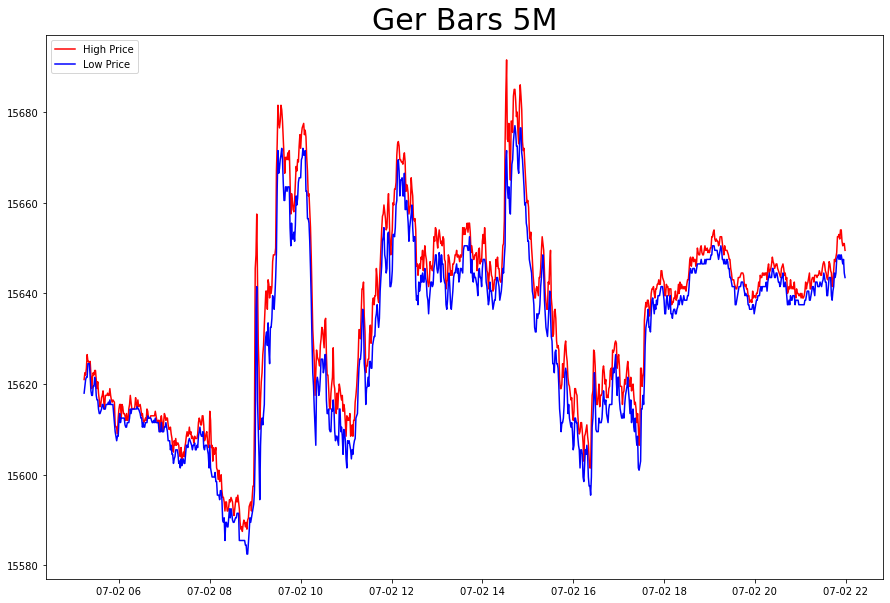

In [24]:
# request 1000 ticks from Ger30
# ger_ticks = mt5.copy_ticks_from("Ger30Jun21", datetime(2021,6,6,), 100, mt5.COPY_TICKS_ALL)

# get bars from different symbols in a number of ways
ger_bars = mt5.copy_rates_from_pos("Ger30Sep21", mt5.TIMEFRAME_M1, 0, 1000)
 
#PLOT
# create DataFrame out of the obtained data
bars_frame = pd.DataFrame(ger_bars)

# convert time in seconds into the datetime format
bars_frame['time']=pd.to_datetime(bars_frame['time'], unit='s')
#bars_frame.head()

# display bars on the chart
plt.figure(figsize=(15, 10))
plt.plot(bars_frame['time'], bars_frame['high'], 'r-', label='High Price')
plt.plot(bars_frame['time'], bars_frame['low'], 'b-', label='Low Price')

# display the legends
plt.legend(loc='upper left')
 
# add the header
plt.title('Ger Bars 5M', size=30)
 
# display the chart
plt.show()

Plotando gráfico de Candlestick

In [96]:
ger_bars = mt5.copy_rates_from_pos("Ger30Sep21", mt5.TIMEFRAME_M1, 0, 100)
bars_frame = pd.DataFrame(ger_bars)
bars_frame['time']=pd.to_datetime(bars_frame['time'], unit='s')
bars_frame.head()
#bars_frame.dtypes
#bars_frame.rename(columns={"time": "Date"})

,time,open,high,low,close,tick_volume,spread,real_volume
0,2021-07-02 20:20:00,15644.5,15645.0,15643.5,15645.0,9,10,0
1,2021-07-02 20:21:00,15644.5,15645.5,15643.5,15645.5,12,10,0
2,2021-07-02 20:22:00,15643.5,15646.5,15643.5,15646.5,16,10,0
3,2021-07-02 20:23:00,15646.0,15648.0,15645.5,15646.5,10,10,0
4,2021-07-02 20:24:00,15647.0,15647.0,15645.5,15645.5,3,10,0


In [99]:
bars_frame.set_index('time', inplace=True)
bars_frame.head()

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2021-07-02 20:20:00,15644.5,15645.0,15643.5,15645.0,9,10,0
2021-07-02 20:21:00,15644.5,15645.5,15643.5,15645.5,12,10,0
2021-07-02 20:22:00,15643.5,15646.5,15643.5,15646.5,16,10,0
2021-07-02 20:23:00,15646.0,15648.0,15645.5,15646.5,10,10,0
2021-07-02 20:24:00,15647.0,15647.0,15645.5,15645.5,3,10,0


Ótima biblioteca https://github.com/matplotlib/mplfinance
Essa biblioteca precisa do dataframe com a data no indice do dataframe, por isso a transformação acima.

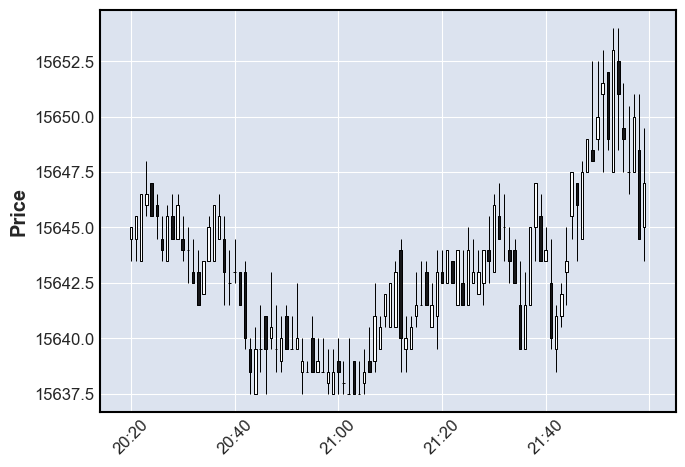

In [100]:
mpf.plot(bars_frame, type="candle")

Alterando algumas configurações de plotagem da biblioteca MPL Finance com nova plotagem com visual melhor.

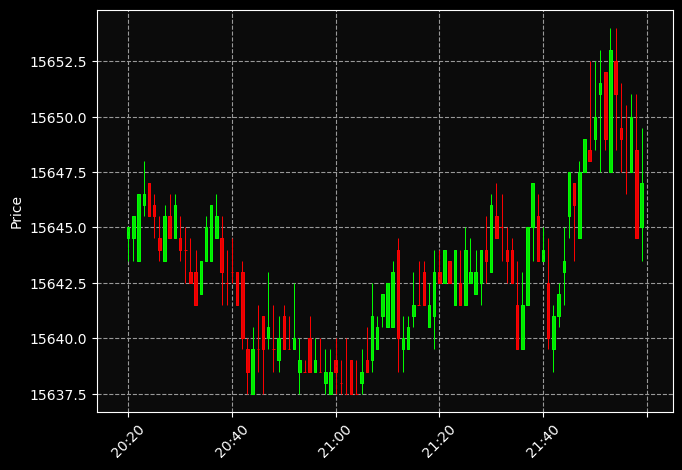

In [106]:
colors = mpf.make_marketcolors(up="#00ff00", down="#ff0000", wick="inherit", edge="inherit", volume="in")
mpf_style = mpf.make_mpf_style(base_mpf_style='nightclouds', marketcolors=colors)

mpf.plot(bars_frame, type="candle", style=mpf_style)

Desligando conexão com MT5

In [13]:
mt5.shutdown()

True